In [10]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt


n_samples = 10000

n_input = 10
n_output = 5
n_hidden = 15
n_layers = 2
hidden_dict = {}

opt = tf.train.MomentumOptimizer(
    learning_rate=0.0000000001,
    momentum=0.7)

discount = 0.5

# TODO USE ACTUAL MAPPED INSTANCES INSTEAD OF THESE RANDOMLY GENERATED VECTORS
actions = np.random.binomial(n_output-1,[1/n_output],n_samples)
instances = np.arange(n_input*n_samples).reshape(n_samples,n_input).astype(float)
transitions = np.arange(n_input*n_samples).reshape(n_samples,n_input).astype(float)
rewards = np.matmul(0.0001*np.arange(n_input).reshape(1,-1),instances.T) ** 2 


# TODO STANDARDIZE INPUTS AND OUTPUTS

ini_mean = 0
ini_std = 1
activation = tf.nn.relu

def weight_matrix(n_from,n_to):
    return tf.Variable(tf.truncated_normal(
        shape=(n_from,n_to)
        ,mean=ini_mean
        ,stddev=ini_std/np.sqrt(n_from+n_to)
        ,dtype=tf.float32))

def bias_matrix(n_to):
    return tf.Variable(tf.zeros(shape=(1,n_to),dtype=tf.float32))


input_layer = tf.placeholder(name='q_input', shape=(None,n_input),dtype=tf.float32)

for n in range(1,n_layers+1):
    hidden_dict[n] = {}
    if n == 1:
        hidden_dict[n]['weights'] = weight_matrix(n_input,n_hidden)
        hidden_dict[n]['bias'] = bias_matrix(n_hidden)
        hidden_dict[n]['layer'] = activation(tf.matmul(input_layer,hidden_dict[n]['weights']) + hidden_dict[n]['bias'])
    else:
        hidden_dict[n]['weights'] = weight_matrix(n_hidden,n_hidden)
        hidden_dict[n]['bias'] = bias_matrix(n_hidden)
        hidden_dict[n]['layer'] = activation(tf.matmul(hidden_dict[n-1]['layer'],hidden_dict[n]['weights']) + hidden_dict[n]['bias'])
        

output_weights = weight_matrix(n_hidden,n_output)
output_bias = bias_matrix(n_output)

output_pred = tf.matmul(hidden_dict[n_layers]['layer'],output_weights) + output_bias
output_truth = tf.placeholder(shape=(None,n_output),dtype=tf.float32)

loss = tf.reduce_mean(tf.nn.l2_loss(output_truth - output_pred))


all_variables = [hidden_dict[n]['weights'] for n in range(1,n_layers+1)] + [output_weights] + [hidden_dict[n]['bias'] for n in range(1,n_layers+1)] + [output_bias]
opt_op = opt.minimize(loss, var_list = all_variables)


In [12]:

builder = tf.saved_model.builder.SavedModelBuilder("./tmp/model.ckpt")

n_epochs = 5000

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
pbar = tqdm(range(n_epochs))
_losses = []
for _ in pbar:

    bellman_trans_q = np.max(sess.run(output_pred, feed_dict={input_layer:transitions}),axis=1)

    ground_truth = sess.run(output_pred, feed_dict={input_layer:instances})
    ground_truth[list(range(n_samples)),actions] = rewards + discount*bellman_trans_q

    _, _loss = sess.run([opt_op,loss],feed_dict={input_layer:instances, output_truth:ground_truth})
    _losses.append(_loss)
    pbar.set_description('loss: {}'.format(_loss))
    
    ### TODO : Save model w/trained variables for use in target task
    
builder.add_meta_graph_and_variables(sess,
                                     ['q_learning']
                                        
                                       )

save_path = builder.save()

print('done - model saved at', save_path)

sess.close()
    
plt.plot(list(range(n_epochs)),_losses)
plt.show()


loss: nan:   3%|▎         | 144/5000 [00:03<02:22, 33.96it/s]

KeyboardInterrupt: 

In [20]:
rewards + discount*bellman_trans_q

array([   168.65229797,    169.65229797,    170.65229797, ...,
        10165.65229797,  10166.65229797,  10167.65229797])

In [8]:
bellman_trans_q

array([ 0.00155675,  0.00486267,  0.00815904,  0.01144711,  0.01473459,
        0.01802206,  0.02130952,  0.024597  ,  0.02788446,  0.03117194,
        0.03445941,  0.03774688,  0.04103435,  0.04432182,  0.04760929,
        0.05089676,  0.05418424,  0.0574717 ,  0.06075917,  0.06404664,
        0.06733412,  0.07062159,  0.07390906,  0.07719652,  0.080484  ,
        0.08377147,  0.08705894,  0.0903464 ,  0.09363387,  0.09692135,
        0.10020883,  0.1034963 ,  0.10678376,  0.11007124,  0.11335869,
        0.11664617,  0.11993365,  0.12322111,  0.12650858,  0.12979603,
        0.13308352,  0.136371  ,  0.13965845,  0.14294593,  0.14623341,
        0.14952087,  0.15280832,  0.15609582,  0.15938328,  0.16267078,
        0.16595821,  0.16924568,  0.17253317,  0.17582062,  0.17910813,
        0.18239559,  0.18568304,  0.18897052,  0.192258  ,  0.19554541,
        0.19883293,  0.20212041,  0.20540783,  0.20869534,  0.21198282,
        0.21527027,  0.21855776,  0.22184522,  0.22513269,  0.22

In [78]:
from collections import deque

d = deque([],5)

d.append([np.array([1]),np.array([1]),np.array([1])])

d.append([np.array([1]),np.array([1]),np.array([1])])

d.append([np.array([1]),np.array([1]),np.array([1])])

d.append([np.array([1]),np.array([1]),np.array([1])])

d.append([np.array([1]),np.array([1]),np.array([1])])
d.append([np.array([1]),np.array([1]),np.array([1])])

In [27]:
np.array(d).shape

(5, 3)

In [26]:
d

deque([array([1, 2, 3]),
       array([1, 2, 3]),
       array([1, 2, 3]),
       array([1, 2, 3]),
       array([1, 2, 3])])

In [28]:
tf.Session.close()

TypeError: close() missing 1 required positional argument: 'self'

In [34]:
opt_vars = {
                    "momentum":0.5}

opt = tf.train.MomentumOptimizer(learning_rate=0.01,**opt_vars)

In [37]:
np.random.randn(n_input*n_samples).reshape(n_samples,n_input).astype(float).shape

(10000, 10)

In [52]:
np.random.binomial(1,[1/5],9)

array([0, 0, 1, 0, 0, 1, 0, 0, 0])

In [57]:
np.random.choice(np.array(d),2)

ValueError: a must be 1-dimensional

In [59]:
np.array(d).shape

(5, 3, 1)

In [62]:
for a,b,c,d in zip([1],[2],[3],[4]):
    print(a,b,c,d)

1 2 3 4




  0%|          | 0/500 [00:00<?, ?it/s]

loss: 519.845947265625:   0%|          | 2/500 [00:00<00:25, 19.63it/s]

loss: 527.7647705078125:   1%|          | 5/500 [00:00<00:22, 21.58it/s]

loss: 543.9395141601562:   2%|▏         | 8/500 [00:00<00:21, 22.51it/s]

loss: 559.4931030273438:   2%|▏         | 11/500 [00:00<00:20, 23.72it/s]

loss: 571.960693359375:   3%|▎         | 14/500 [00:00<00:19, 24.95it/s] 

loss: 580.4751586914062:   3%|▎         | 17/500 [00:00<00:23, 20.66it/s]

loss: 583.245361328125:   4%|▍         | 19/500 [00:00<00:24, 19.90it/s] 

loss: 579.2476806640625:   4%|▍         | 22/500 [00:00<00:23, 20.58it/s]

loss: 559.9461059570312:   5%|▌         | 25/500 [00:01<00:27, 17.26it/s]

loss: 530.5084228515625:   6%|▌         | 28/500 [00:01<00:27, 17.42it/s]

loss: 511.6873474121094:   6%|▌         | 30/500 [00:01<00:26, 17.99it/s]

loss: 495.66107177734375:   6%|▋         | 32/500 [00:01<00:26, 17.53it/s]

loss: 477.3502502441406:   7%|▋         | 35/500 [00:01<00:2

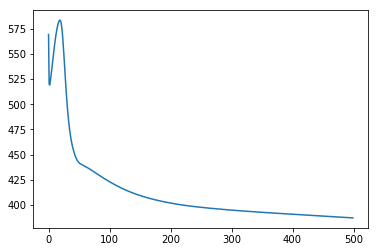

In [117]:
%run dqn.py

In [110]:
%debug

> /Users/dangoldberg/Desktop/code/tlrl/ammar_TrRBM/dqn.py(103)run_training()
    101 
    102             ground_truth = self.sess.run(self.output_pred, feed_dict={self.input_layer:states})
--> 103             ground_truth[list(range(len(states))),coded_actions] = rewards + (self.discount_rate * bellman_trans_q) #this is the bellman update for fitted q iteration, with all non-action outputs as the Q value that will be predicted by the current network - this negates any back-prop through these output nodes.
    104 
    105             _, _loss = self.sess.run([self.opt_op,self.loss],feed_dict={self.input_layer:states, self.output_truth:ground_truth})

ipdb> coded_actions.shape
(5000,)
ipdb> len(states)
5000
ipdb> ground_truth.shape
(5000, 5)
ipdb> (rewards + (self.discount_rate * bellman_trans_q)).shape
(5000, 5000)
ipdb> rewards.shape
(5000, 1)
ipdb> (self.discount_rate * bellman_trans_q).shape
(5000,)
ipdb> exit


In [ ]:
def add_new_obvs(states, actions, transitions, rewards):
    for state, action, transition, reward in zip(states, actions, transitions, rewards):
        memory.append([state, action, transition, reward])

def get_memory_sample(size):
    states, actions, transitions, rewards = [], [], [], []
    for sample in self.memory:
        states.append(sample[0])
        actions.append(sample[1])
        transitions.append(sample[2])
        rewards.append(sample[3])

    return states, actions, transitions, rewards

In [76]:
import collections

d = collections.deque()

In [80]:
states, actions, transitions, rewards

(array([[ 2.43918282, -0.58444084,  0.11264756, ..., -0.4714663 ,
          0.89249358, -0.55685438],
        [-0.10888   , -1.14083787, -0.53595152, ...,  1.03122628,
          0.65972543,  1.13463328],
        [ 0.55203697, -0.31454331, -0.60457703, ..., -2.03158855,
          0.26756465, -2.07458796],
        ..., 
        [ 0.91891541, -1.49378155,  0.0181568 , ...,  0.81051976,
          0.29324992,  1.61161804],
        [-0.27262964,  0.1810991 , -1.21626747, ...,  0.38731252,
          0.1738588 ,  2.16139519],
        [-0.86596022,  0.33566534, -0.6122154 , ...,  2.30179071,
         -0.69565123,  0.84795211]]),
 array([1, 0, 1, ..., 2, 1, 0]),
 array([[-0.19382411,  0.79656287, -2.94489154, ..., -0.65764776,
          1.47483204,  1.66108011],
        [-2.1695916 , -0.59184139,  0.11876494, ..., -1.29736823,
          0.91997308, -0.02790676],
        [-0.13390124,  0.96205925,  0.68200548, ..., -0.08187998,
          1.51177828, -1.3507033 ],
        ..., 
        [-0.3266836

In [96]:
for i in range(len(states)):
    d.append([states[i], actions[i], transitions[i], rewards[:,i]])

In [100]:
d[0]

[array([-1.36520282,  0.38565904,  0.44092397,  0.39307153,  0.99753586,
         1.68507584,  0.2553062 ,  0.33435456,  0.31859158, -0.15276482]),
 1,
 array([-0.24778851, -0.70925205, -0.4807787 ,  0.90672629, -1.84864831,
         0.29696836, -1.31853372,  0.07155529, -0.04958519,  0.21237698]),
 array([0])]

In [102]:
states, actions, transitions, rewards = [], [], [], []
for sample in d:
    states.append(sample[0])
    actions.append(sample[1])
    transitions.append(sample[2])
    rewards.append(sample[3])

In [105]:
np.array(states).shape

(5, 10)

In [13]:
import collections
import numpy as np

a = collections.deque([],50000)

In [14]:
a

deque([])

In [15]:
n=0
while n < 10000:
    n+=1
    a.append([1,2,3,4,5])

In [16]:
a

deque([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3,

In [19]:
def get_memory_sample(deq, size):
    states, actions, transitions, rewards = [], [], [], []
    for i in np.random.choice(range(len(deq)),size):
        states.append(deq[i][0])
        actions.append(deq[i][1])
        transitions.append(deq[i][2])
        rewards.append(deq[i][3])
        
    return np.array(states), np.array(actions), np.array(transitions), np.array(rewards)



In [22]:
get_memory_sample(a, 32)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3]),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4]))